In [1]:
import pandas as pd

In [2]:
from statsmodels.tsa.stattools import adfuller

In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [4]:
import statsmodels.api as sm

In [5]:
import pmdarima

In [6]:
from pmdarima.arima import auto_arima

In [7]:
df=pd.read_excel(r'C:\Users\ZarasAndreas\Documents\Documents\Courses Taught by Me\Forecasting Course_FINAL\FINAL\Course Presentations\Python\Internet_Users - Python.xlsx')

In [8]:
df=df.set_index("Minute")
df

,Users
Minute,
1,88
2,84
3,85
4,85
5,84
...,...
96,222
97,228
98,226


<AxesSubplot:xlabel='Minute'>

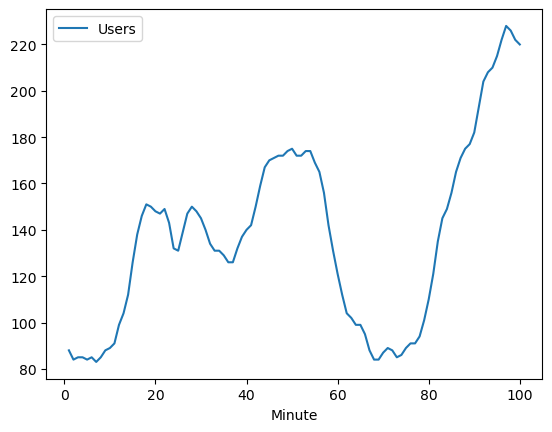

In [9]:
df.plot()

In [10]:
split=round(len(df)*0.75)
train=df.iloc[:split,:]
validation=df.iloc[split:]
train

,Users
Minute,
1,88
2,84
3,85
4,85
5,84
...,...
71,89
72,88
73,85


In [11]:
validation

,Users
Minute,
76,91
77,91
78,94
79,101
80,110
81,121
82,135
83,145
84,149


In [12]:
adfuller(train)

(-2.3566243098856705,
 0.15435484019978563,
 3,
 71,
 {'1%': -3.526004646825607,
  '5%': -2.9032002348069774,
  '10%': -2.5889948363419957},
 323.39865215505154)

In [13]:
train_diff = train.diff(1)

(-2.6170750087272894,
 0.08951931216577119,
 2,
 71,
 {'1%': -3.526004646825607,
  '5%': -2.9032002348069774,
  '10%': -2.5889948363419957},
 317.03461471772334)

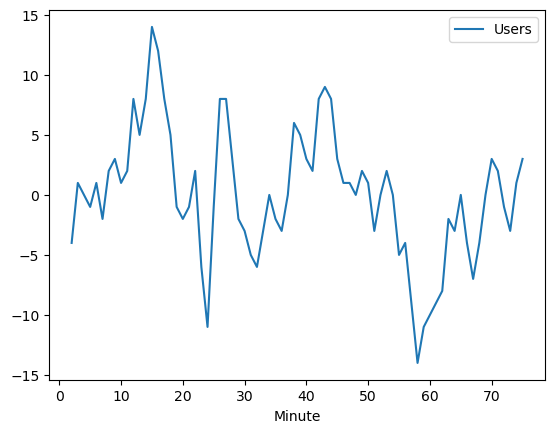

In [14]:
train_diff=train_diff.dropna()
train_diff.plot()
adfuller(train_diff)

At 10% we are OK

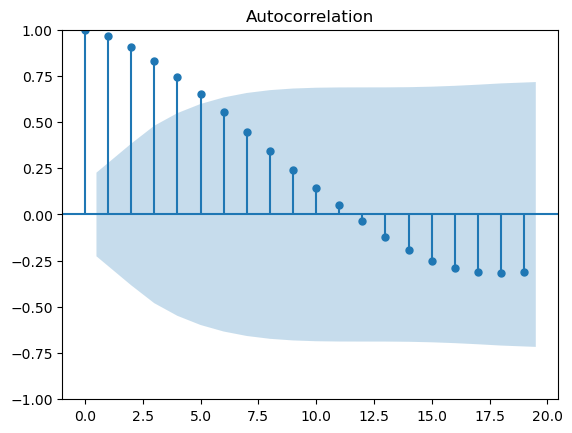

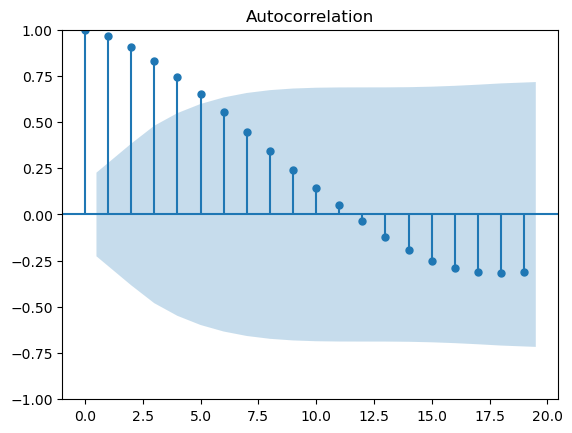

In [15]:
plot_acf(train)

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


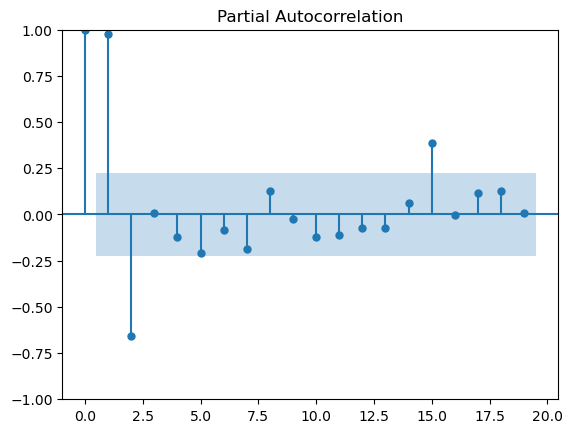

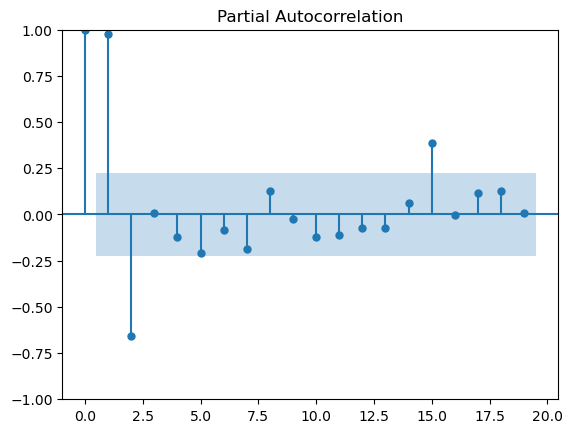

In [16]:
plot_pacf(train)

In [17]:
sarimax = sm.tsa.statespace.SARIMAX(train,order=(2,1,0),seasonal_order=(0,0,0,0)).fit()

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [18]:
sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Users   No. Observations:                   75
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -192.759
Date:                Sun, 05 Feb 2023   AIC                            391.517
Time:                        19:19:58   BIC                            398.430
Sample:                             0   HQIC                           394.275
                                 - 75                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0025      0.102      9.809      0.000       0.802       1.203
ar.L2         -0.2955      0.110     -2.682      0.007      -0.511      -0.080
sigma2        10.5588      1.688      6.257      0.000       7.251      13.866
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                 0.62
Prob(Q):                              0.54   Prob(JB):                         0.73
Heteroskedasticity (H):               0.59   Skew:                             0.22
Prob(H) (two-sided):                  0.20   Kurtosis:                         3.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
auto_model = auto_arima(train, start_p=0, start_q=0,start_P=0,start_Q=0,information_criterion='aic')
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   75
Model:               SARIMAX(4, 0, 0)   Log Likelihood                -192.580
Date:                Sun, 05 Feb 2023   AIC                            397.160
Time:                        19:20:00   BIC                            411.064
Sample:                             0   HQIC                           402.712
                                 - 75                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.5440      1.755      2.019      0.043       0.104       6.984
ar.L1          2.0350      0.109     18.690      0.000       1.822       2.248
ar.L2         -1.6027      0.222     -7.209      0.000      -2.038      -1.167
ar.L3          0.8432      0.227      3.712      0.000       0.398       1.288
ar.L4         -0.3041      0.113     -2.688      0.007      -0.526      -0.082
sigma2         9.1871      1.694      5.424      0.000       5.868      12.507
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.21
Prob(Q):                              0.95   Prob(JB):                         0.90
Heteroskedasticity (H):               0.64   Skew:                             0.07
Prob(H) (two-sided):                  0.28   Kurtosis:                         2.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
auto_model = auto_arima(train, start_p=0, start_q=0,test='adf',start_P=0,start_Q=0,information_criterion='aic')
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   75
Model:               SARIMAX(0, 2, 3)   Log Likelihood                -190.312
Date:                Sun, 05 Feb 2023   AIC                            388.624
Time:                        19:20:01   BIC                            397.786
Sample:                             0   HQIC                           392.275
                                 - 75                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1972      0.119      1.660      0.097      -0.036       0.430
ma.L2         -0.3932      0.094     -4.180      0.000      -0.578      -0.209
ma.L3         -0.3010      0.121     -2.491      0.013      -0.538      -0.064
sigma2        10.6762      1.774      6.017      0.000       7.198      14.154
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.01
Prob(Q):                              0.90   Prob(JB):                         1.00
Heteroskedasticity (H):               0.60   Skew:                            -0.01
Prob(H) (two-sided):                  0.22   Kurtosis:                         3.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

default stationarity test test='kpss',  (Kwiatkowski–Phillips–Schmidt–Shin)